In [706]:
from selenium import webdriver
import time, os
from selenium.webdriver.common.keys import Keys
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler

## Get HTML page through Chrome Driver using Selenium

In [4]:
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)
driver.get('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130606&end=20210916')
time.sleep(10)

## Make a beautiful Soup out of the HTML page.

#### Note: before below cell was executed, I scrolled down in the web page that the above cell generated so that driver.page_source returns all the available executed web page script not only what is shown initially

In [16]:
driver.page_source[:1000]
soup = BeautifulSoup(driver.page_source, 'lxml')
table=soup.find('table')
rows=table.find_all("tr")
rows=rows[1:] #to delete first row that has headers
rows[0]

<tr><td style="text-align: left;">Sep 16, 2021</td><td>$48,158.91</td><td>$48,486.83</td><td>$47,079.56</td><td>$47,783.36</td><td>$31,764,293,754</td><td style="text-align: right;">$899,179,151,780</td></tr>

### Getting  data of each row in the table and save it in a dictionary

In [666]:
data_dict={}
    
for row in rows:
    data_per_row=row.find_all("td")
    date=data_per_row[0].text.strip()
    open_price=data_per_row[1].text.strip()
    highest_price=data_per_row[2].text.strip()
    lowest_price=data_per_row[3].text.strip()
    close_price=data_per_row[4].text.strip()
    volume=data_per_row[5].text.strip()
    market_cap=data_per_row[6].text.strip()

    data_dict[date]=[date,open_price,highest_price,lowest_price,close_price,volume,market_cap]

### Convert Dictionary to Data Frame

In [667]:
Bitcoin_df=pd.DataFrame(data_dict).T
Bitcoin_df.columns=['Date','Open_Price','Highest_Price','Lowest_Price','Close_Price','Volume','Market_Cap']
Bitcoin_df.reset_index(drop=True,inplace=True)

In [668]:
Bitcoin_df.tail(3)

,Date,Open_Price,Highest_Price,Lowest_Price,Close_Price,Volume,Market_Cap
3061,"Apr 30, 2013",$144.00,$146.93,$134.05,$139.00,$0,"$1,542,813,125"
3062,"Apr 29, 2013",$134.44,$147.49,$134.00,$144.54,$0,"$1,603,768,865"
3063,"Apr 28, 2013",$135.30,$135.98,$132.10,$134.21,$0,"$1,488,566,728"


In [669]:
Bitcoin_df.head(7)

,Date,Open_Price,Highest_Price,Lowest_Price,Close_Price,Volume,Market_Cap
0,"Sep 16, 2021","$48,158.91","$48,486.83","$47,079.56","$47,783.36","$31,764,293,754","$899,179,151,780"
1,"Sep 15, 2021","$47,098.00","$48,450.47","$46,773.33","$48,176.35","$30,484,496,466","$906,532,479,371"
2,"Sep 14, 2021","$44,960.05","$47,218.13","$44,752.33","$47,092.49","$38,652,152,880","$886,095,283,701"
3,"Sep 13, 2021","$46,057.22","$46,598.68","$43,591.32","$44,963.07","$40,969,943,253","$845,980,481,365"
4,"Sep 12, 2021","$45,206.63","$46,364.88","$44,790.46","$46,063.27","$27,881,980,161","$866,636,671,662"
5,"Sep 11, 2021","$44,869.84","$45,969.29","$44,818.27","$45,201.46","$34,499,835,245","$850,381,828,071"
6,"Sep 10, 2021","$46,396.66","$47,031.74","$44,344.49","$44,883.91","$39,154,666,597","$844,367,023,727"


In [670]:
type(Bitcoin_df['Date'])

pandas.core.series.Series

### Convert Datatype of date

In [671]:
Bitcoin_df['Date']=pd.to_datetime(Bitcoin_df['Date'])
Bitcoin_df.head(7)

,Date,Open_Price,Highest_Price,Lowest_Price,Close_Price,Volume,Market_Cap
0,2021-09-16,"$48,158.91","$48,486.83","$47,079.56","$47,783.36","$31,764,293,754","$899,179,151,780"
1,2021-09-15,"$47,098.00","$48,450.47","$46,773.33","$48,176.35","$30,484,496,466","$906,532,479,371"
2,2021-09-14,"$44,960.05","$47,218.13","$44,752.33","$47,092.49","$38,652,152,880","$886,095,283,701"
3,2021-09-13,"$46,057.22","$46,598.68","$43,591.32","$44,963.07","$40,969,943,253","$845,980,481,365"
4,2021-09-12,"$45,206.63","$46,364.88","$44,790.46","$46,063.27","$27,881,980,161","$866,636,671,662"
5,2021-09-11,"$44,869.84","$45,969.29","$44,818.27","$45,201.46","$34,499,835,245","$850,381,828,071"
6,2021-09-10,"$46,396.66","$47,031.74","$44,344.49","$44,883.91","$39,154,666,597","$844,367,023,727"


###  Cleaning Data by removing '$'  and ',' signs

In [672]:
for column in Bitcoin_df.columns:
    print(Bitcoin_df[column].dtype)
    if(Bitcoin_df[column].dtype == 'object'):
        Bitcoin_df[column]=Bitcoin_df[column].str.replace('$','')
        Bitcoin_df[column]=Bitcoin_df[column].str.replace(',','')
        Bitcoin_df[column]=Bitcoin_df[column].astype('float')

datetime64[ns]
object
object
object
object
object
object


## Some initial  EDA

In [863]:
EDA_df=Bitcoin_df[['Average_Transaction_Confirmation_time']]
EDA_df.set_index(Bitcoin_df['Date'],inplace=True)
EDA_df.head(3)

,Average_Transaction_Confirmation_time
Date,
2021-09-16,10.137500
2021-09-15,9.750000
2021-09-14,6.291667


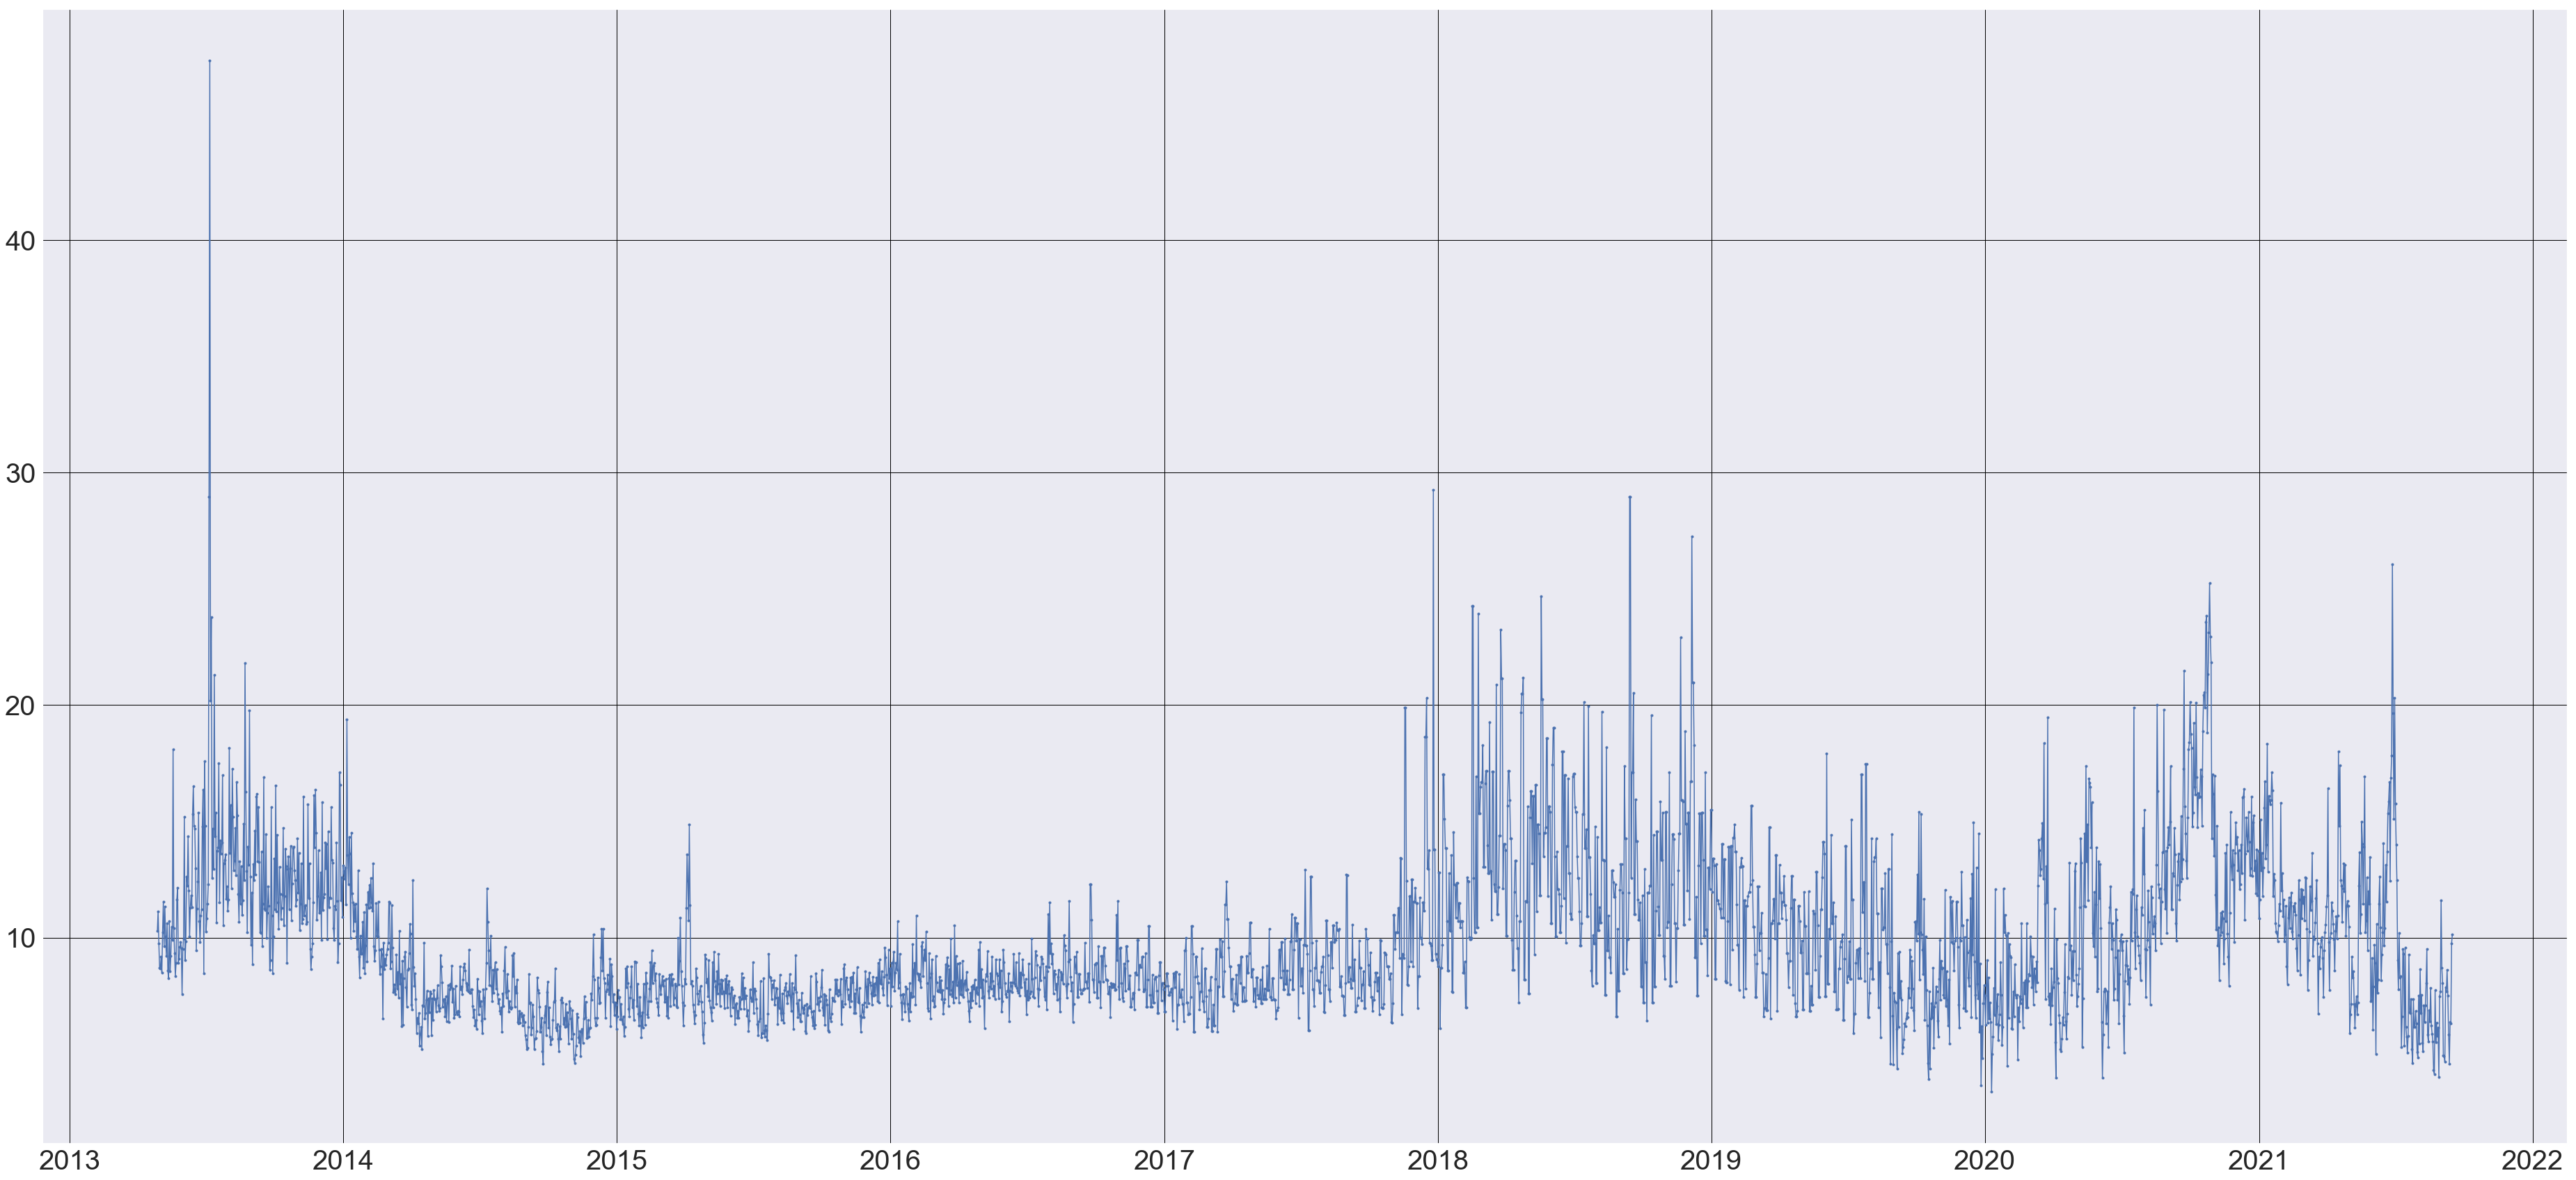

In [864]:
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
plt.figure(figsize = [65,30])
plt.plot(EDA_df,marker='.')
plt.grid(b=True,color='black')

### Let's see one year 

In [867]:
EDA_df=EDA_df.loc[EDA_df.index.year>2020]

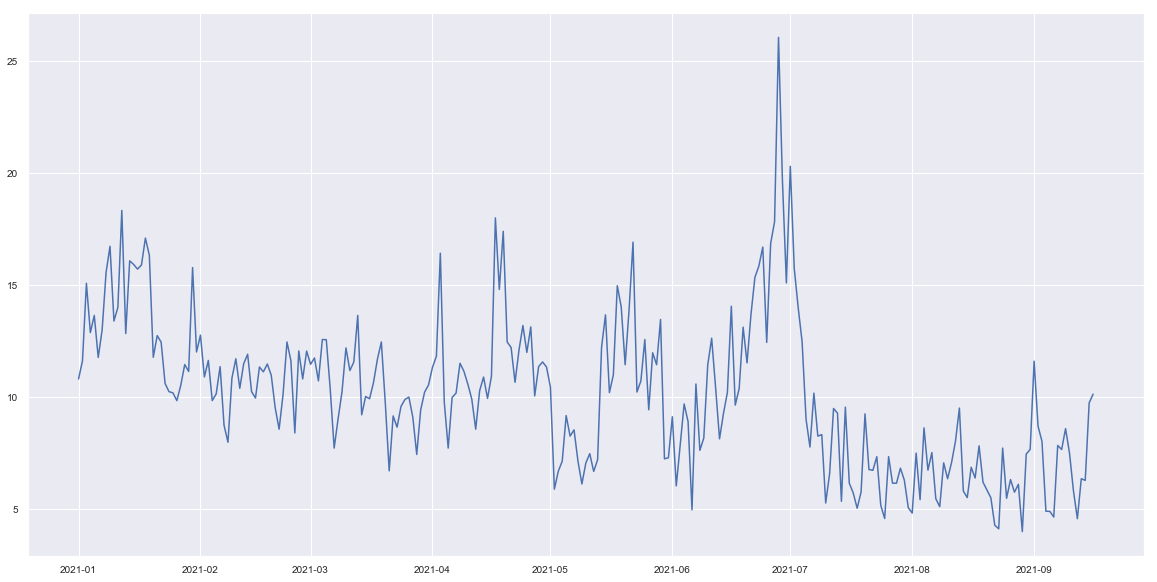

In [868]:
plt.rc('xtick',labelsize=10) 
plt.rc('ytick',labelsize=10) 
plt.figure(figsize = [20,10])
plt.plot(EDA_df)

## Decision: Dropping stock data before 2017 because it will not give important information

In [677]:
#Bitcoin_df=Bitcoin_df.loc[Bitcoin_df['Date'] >= '2017-1-1']
Bitcoin_df.tail(3)

,Date,Open_Price,Highest_Price,Lowest_Price,Close_Price,Volume,Market_Cap
3061,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09
3062,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09
3063,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09


## Read data of daily Bitcoin Transacations taken from: https://data.nasdaq.com/data/BCHAIN/NTRAN-bitcoin-number-of-transactions

In [678]:
Bitcion_transaction=pd.read_csv('BCHAIN-NTRAN.csv')
Bitcion_transaction['Date']=pd.to_datetime(Bitcion_transaction['Date'])
Bitcion_transaction.head(7)

,Date,Value
0,2021-09-16,271223.0
1,2021-09-15,268957.0
2,2021-09-14,268127.0
3,2021-09-13,255970.0
4,2021-09-12,192691.0
5,2021-09-11,218445.0
6,2021-09-10,261371.0


### Interesting point..Here is the first ten days of bitcoin starting from 2-1-2009 :) 

In [679]:
Bitcion_transaction.tail(10)

,Date,Value
4631,2009-01-11,95.0
4632,2009-01-10,106.0
4633,2009-01-09,31.0
4634,2009-01-08,14.0
4635,2009-01-07,0.0
4636,2009-01-06,0.0
4637,2009-01-05,0.0
4638,2009-01-04,0.0
4639,2009-01-03,0.0
4640,2009-01-02,1.0


### Merge Bitcoin Historical Prices Data with Daily Transactions Data into one Data Frame

In [680]:
Bitcoin_df=pd.merge(Bitcoin_df,Bitcion_transaction,on='Date')
Bitcoin_df.rename(columns={'Value':'Daily_Transactions'},inplace=True)

In [681]:
Bitcoin_df.head(7)

,Date,Open_Price,Highest_Price,Lowest_Price,Close_Price,Volume,Market_Cap,Daily_Transactions
0,2021-09-16,48158.91,48486.83,47079.56,47783.36,3.176429e+10,8.991792e+11,271223.0
1,2021-09-15,47098.00,48450.47,46773.33,48176.35,3.048450e+10,9.065325e+11,268957.0
2,2021-09-14,44960.05,47218.13,44752.33,47092.49,3.865215e+10,8.860953e+11,268127.0
3,2021-09-13,46057.22,46598.68,43591.32,44963.07,4.096994e+10,8.459805e+11,255970.0
4,2021-09-12,45206.63,46364.88,44790.46,46063.27,2.788198e+10,8.666367e+11,192691.0
5,2021-09-11,44869.84,45969.29,44818.27,45201.46,3.449984e+10,8.503818e+11,218445.0
6,2021-09-10,46396.66,47031.74,44344.49,44883.91,3.915467e+10,8.443670e+11,261371.0


### Additional Features are taken from https://data.nasdaq.com/data/BCHAIN-blockchain

In [682]:
Bitcoin_more_features=pd.read_csv('Bitcoin_AdditionalFeatures.csv')
Bitcoin_more_features['Date']=Bitcoin_more_features['Date'].str.replace('/','-')
Bitcoin_more_features['Date']=pd.to_datetime(Bitcoin_more_features['Date'], format= '%d-%m-%Y')
Bitcoin_more_features.tail(3)

,Date,Miners_Revenue,Difficuly,Cost_Per_Transaction,Average_Block_Size,Total_Bitcoins,Average_Transaction_Confirmation_time
4638,2009-01-04,0.0,0.0,0.0,0.000000,50.0,NaN
4639,2009-01-03,0.0,0.0,0.0,0.000000,50.0,NaN
4640,2009-01-02,0.0,1.0,0.0,0.000272,50.0,NaN


In [683]:
Bitcoin_df=pd.merge(Bitcoin_df,Bitcoin_more_features,on='Date')

In [684]:
Bitcoin_df.tail(3)

,Date,Open_Price,Highest_Price,Lowest_Price,Close_Price,Volume,Market_Cap,Daily_Transactions,Miners_Revenue,Difficuly,Cost_Per_Transaction,Average_Block_Size,Total_Bitcoins,Average_Transaction_Confirmation_time
3061,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,50437.0,442507.288000,10076292.88,8.773466,0.159960,11098275.0,9.750000
3062,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,51776.0,631409.784038,10076292.88,11.861025,0.147566,11098475.0,11.116667
3063,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09,50009.0,645240.091200,8974296.01,12.902479,0.133635,11087150.0,10.275000


## Now we have 14 Features and 1720 Records starting from Data (28-4-2013) To (16-09-2021)

### No NANS

In [685]:
Bitcoin_df.isna().sum()

Date                                     0
Open_Price                               0
Highest_Price                            0
Lowest_Price                             0
Close_Price                              0
Volume                                   0
Market_Cap                               0
Daily_Transactions                       0
Miners_Revenue                           0
Difficuly                                0
Cost_Per_Transaction                     0
Average_Block_Size                       0
Total_Bitcoins                           0
Average_Transaction_Confirmation_time    0
dtype: int64

## Target Variable to be predicted is Average_Transaction_Confirmation_time

### Check outlier

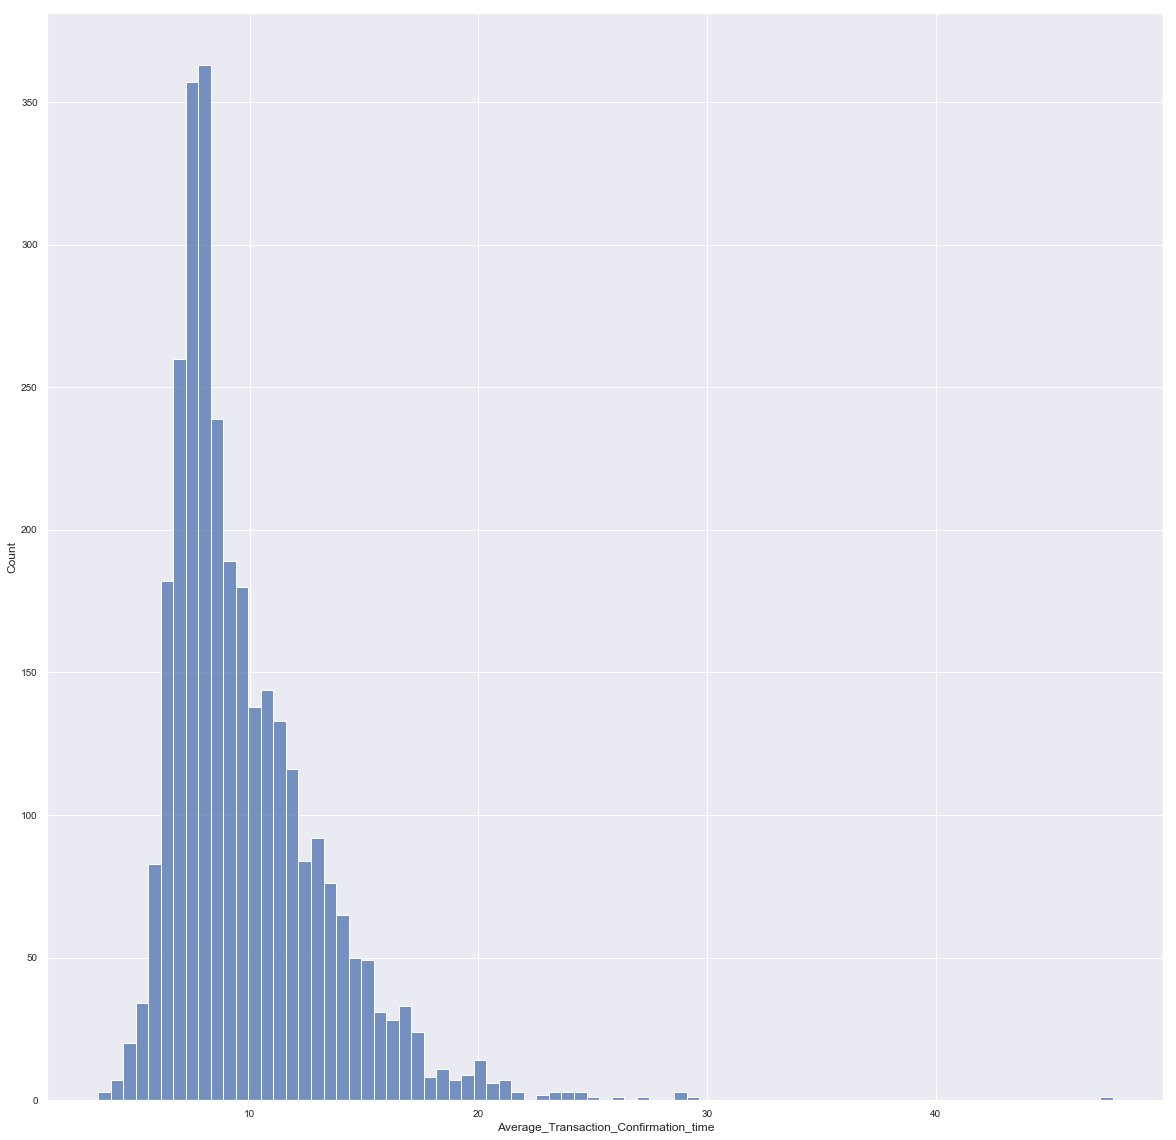

In [876]:
sns.histplot(Bitcoin_df['Average_Transaction_Confirmation_time'])

## Add a new column for date as an integer

In [877]:
def convert_time_to_int(date):
    d=datetime.datetime(date.year,date.month,date.day)
    return calendar.timegm(d.timetuple()) 

In [692]:
Bitcoin_df['Date_As_Int']=Bitcoin_df['Date']
Bitcoin_df['Date_As_Int']=Bitcoin_df['Date_As_Int'].apply(convert_time_to_int)
Bitcoin_df['Date_As_Int'].head(3)

0    1631750400
1    1631664000
2    1631577600
Name: Date_As_Int, dtype: int64

## Add columns for month, year, and day

In [693]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

def get_day(date):
    return date.day

In [694]:
Bitcoin_df['Year']=Bitcoin_df['Date'].apply(get_year)
Bitcoin_df['Month']=Bitcoin_df['Date'].apply(get_month)
Bitcoin_df['Day']=Bitcoin_df['Date'].apply(get_day)

In [695]:
Bitcoin_df.tail(3)

,Date,Open_Price,Highest_Price,Lowest_Price,Close_Price,Volume,Market_Cap,Daily_Transactions,Miners_Revenue,Difficuly,Cost_Per_Transaction,Average_Block_Size,Total_Bitcoins,Average_Transaction_Confirmation_time,Next_Day_Highest_Price,Date_As_Int,Year,Month,Day
3061,2013-04-30,144.00,146.93,134.05,139.00,0.0,1.542813e+09,50437.0,442507.288000,10076292.88,8.773466,0.159960,11098275.0,9.750000,139.89,1367280000,2013,4,30
3062,2013-04-29,134.44,147.49,134.00,144.54,0.0,1.603769e+09,51776.0,631409.784038,10076292.88,11.861025,0.147566,11098475.0,11.116667,146.93,1367193600,2013,4,29
3063,2013-04-28,135.30,135.98,132.10,134.21,0.0,1.488567e+09,50009.0,645240.091200,8974296.01,12.902479,0.133635,11087150.0,10.275000,147.49,1367107200,2013,4,28


In [696]:
Bitcoin_df.corr()

,Open_Price,Highest_Price,Lowest_Price,Close_Price,Volume,Market_Cap,Daily_Transactions,Miners_Revenue,Difficuly,Cost_Per_Transaction,Average_Block_Size,Total_Bitcoins,Average_Transaction_Confirmation_time,Next_Day_Highest_Price,Date_As_Int,Year,Month,Day
Open_Price,1.000000,0.999485,0.998993,0.998752,0.789560,0.998519,0.384754,0.937527,0.788264,0.909450,0.570551,0.589157,0.143825,0.998437,0.693039,0.697242,-0.097334,-0.011648
Highest_Price,0.999485,1.000000,0.998921,0.999457,0.792025,0.999161,0.385010,0.938211,0.787155,0.909287,0.570745,0.588087,0.144223,0.999130,0.691891,0.696231,-0.098447,-0.011466
Lowest_Price,0.998993,0.998921,1.000000,0.999344,0.783323,0.999178,0.386231,0.936931,0.789649,0.908903,0.571141,0.591267,0.141859,0.998649,0.695317,0.699210,-0.094735,-0.012747
Close_Price,0.998752,0.999457,0.999344,1.000000,0.788215,0.999751,0.385920,0.937563,0.788155,0.908708,0.570985,0.589445,0.143047,0.999481,0.693383,0.697525,-0.096767,-0.012435
Volume,0.789560,0.792025,0.783323,0.788215,1.000000,0.788673,0.492911,0.757268,0.863549,0.658194,0.630379,0.628453,0.188096,0.789822,0.725438,0.734043,-0.140025,0.002792
Market_Cap,0.998519,0.999161,0.999178,0.999751,0.788673,1.000000,0.378963,0.930962,0.789399,0.902729,0.565685,0.584060,0.137060,0.999187,0.689377,0.693574,-0.096897,-0.012330
Daily_Transactions,0.384754,0.385010,0.386231,0.385920,0.492911,0.378963,1.000000,0.492608,0.569863,0.263770,0.909295,0.873969,0.086709,0.385745,0.823311,0.817857,-0.025162,-0.016346
Miners_Revenue,0.937527,0.938211,0.936931,0.937563,0.757268,0.930962,0.492608,1.000000,0.735013,0.938407,0.603294,0.633041,0.156657,0.937509,0.713224,0.717197,-0.096117,-0.023121
Difficuly,0.788264,0.787155,0.789649,0.788155,0.863549,0.789399,0.569863,0.735013,1.000000,0.651063,0.725889,0.768194,0.240669,0.787076,0.873104,0.868059,-0.034442,0.003210
Cost_Per_Transaction,0.909450,0.909287,0.908903,0.908708,0.658194,0.902729,0.263770,0.938407,0.651063,1.000000,0.431894,0.496676,0.171217,0.908295,0.593226,0.600318,-0.113174,-0.013597


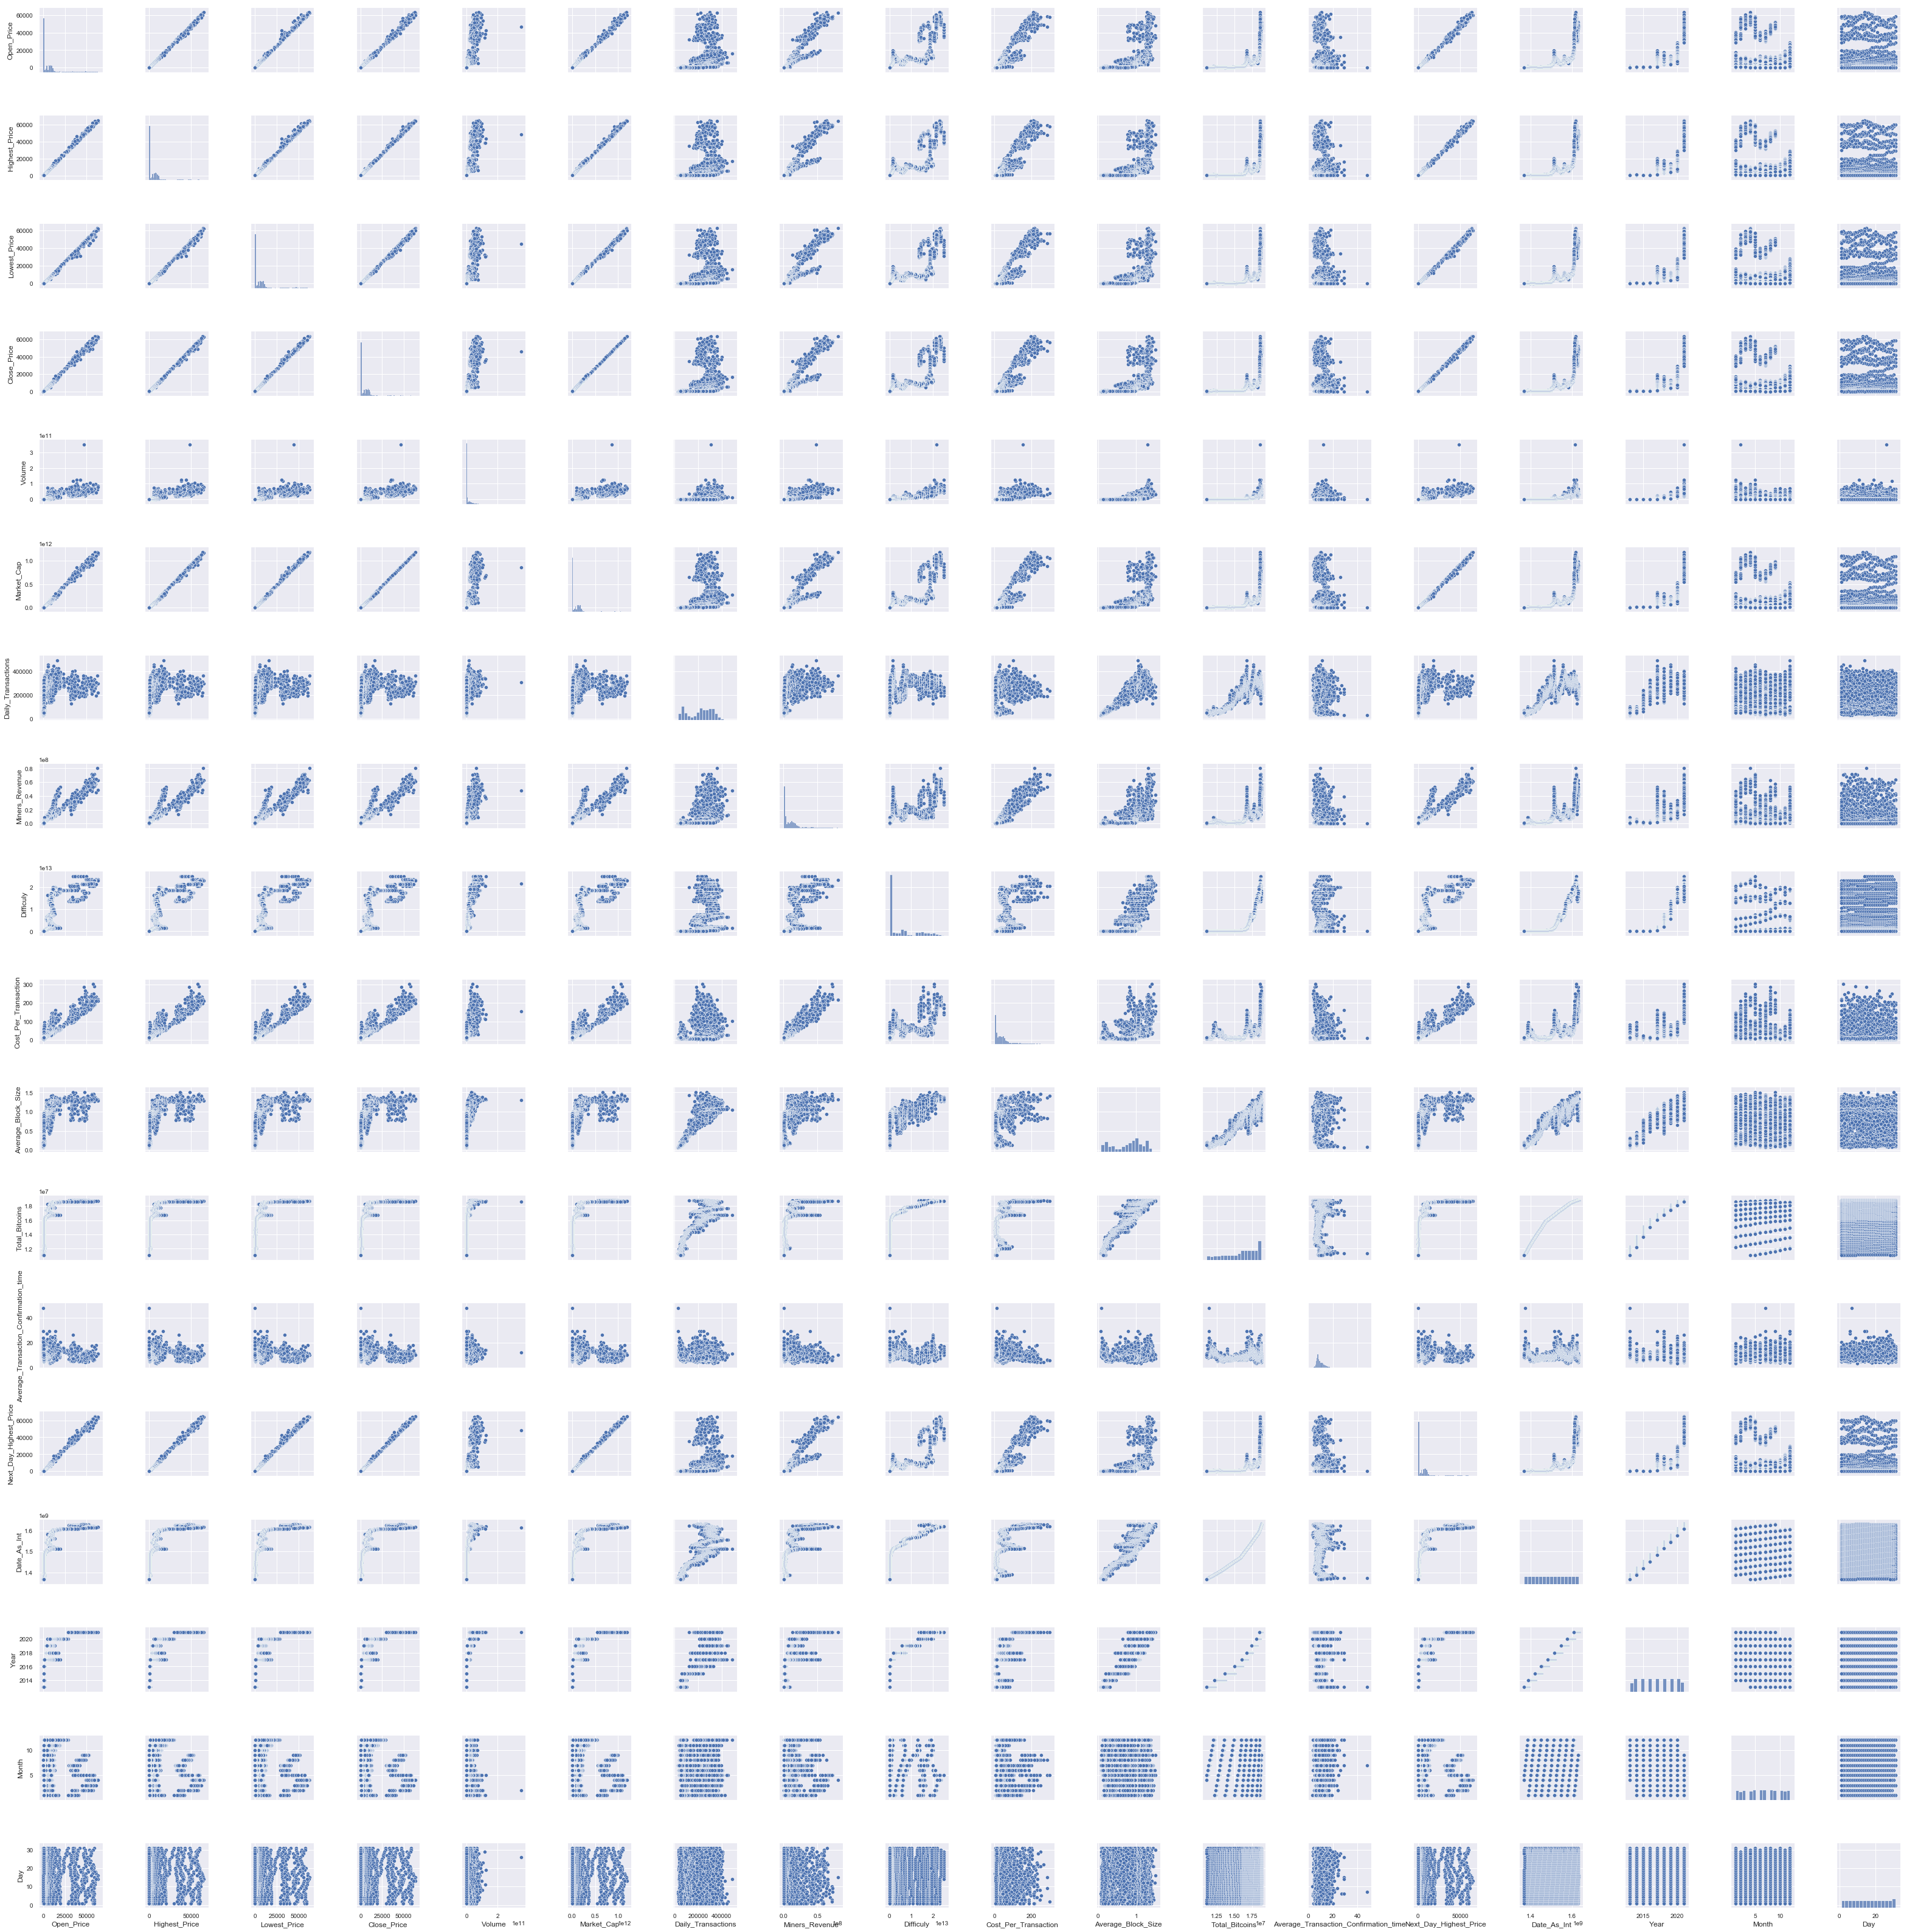

In [697]:
sns.pairplot(Bitcoin_df)

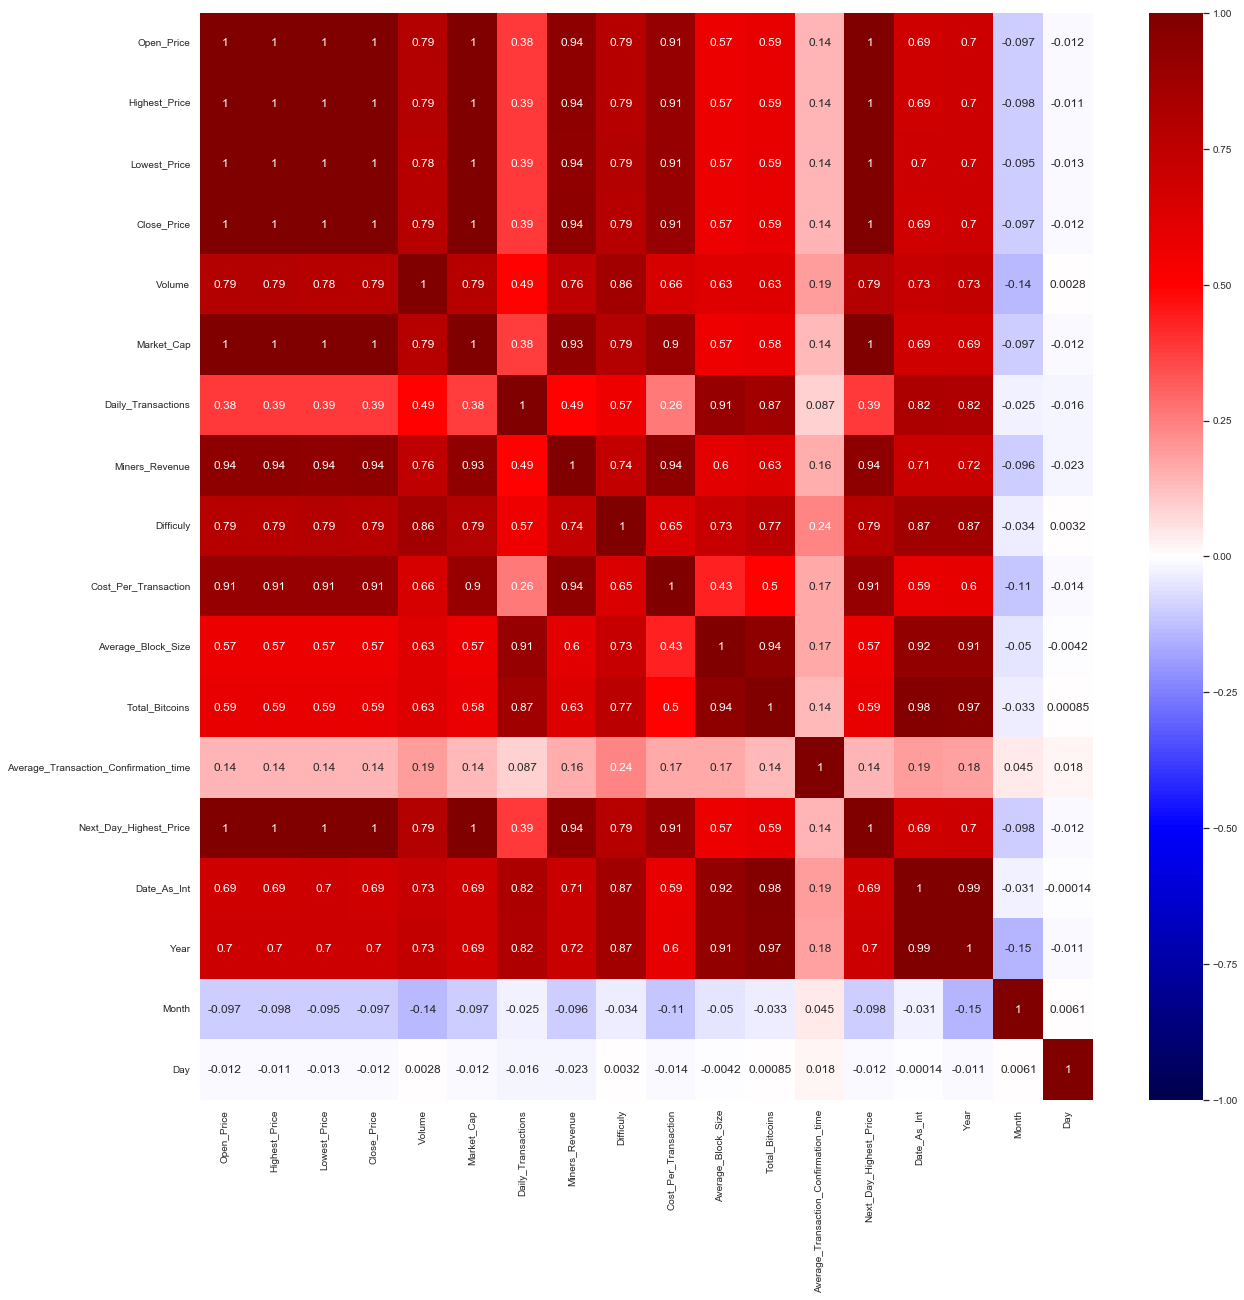

In [698]:
sns.heatmap(Bitcoin_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

## Pandas Profiling

In [ ]:
# to be added 

## Splitting Data

In [847]:
X=Bitcoin_df.drop(['Next_Day_Highest_Price','Date','Open_Price','Highest_Price','Lowest_Price','Close_Price'],axis=1)
Y=Bitcoin_df['Next_Day_Highest_Price']

train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=1)

In [848]:
train_X

,Volume,Market_Cap,Daily_Transactions,Miners_Revenue,Difficuly,Cost_Per_Transaction,Average_Block_Size,Total_Bitcoins,Average_Transaction_Confirmation_time,Date_As_Int,Year,Month,Day
1650,2.833200e+08,1.906047e+10,280681.0,2.359087e+06,4.607694e+11,8.691791,0.997576,16209975.00,9.500000,1489190400,2017,3,11
2985,0.000000e+00,1.123659e+09,38784.0,4.010393e+05,2.616288e+07,10.340330,0.103535,11422425.00,15.366667,1373846400,2013,7,15
544,4.249439e+10,1.130682e+11,245896.0,9.873966e+06,1.655292e+13,40.155050,1.108334,18279500.00,11.466667,1584748800,2020,3,21
2748,1.539650e+07,7.958688e+09,66786.0,2.574417e+06,3.815724e+09,38.547250,0.227688,12497575.00,7.650000,1394323200,2014,3,9
1911,2.534620e+08,9.791650e+09,241300.0,2.193394e+06,2.094532e+11,9.270000,0.910000,15692350.00,8.483333,1466640000,2016,6,23
368,3.650685e+10,1.908708e+11,255110.0,1.103873e+07,1.734600e+13,43.270486,0.938489,18488506.25,9.866667,1599955200,2020,9,13
1497,2.021190e+09,6.024184e+10,284001.0,7.130611e+06,9.232331e+11,26.027902,0.967171,16501825.00,9.800000,1502409600,2017,8,11
877,1.586731e+10,9.841739e+10,311753.0,8.538020e+06,6.353031e+12,27.387130,1.255767,17661625.00,7.166667,1555977600,2019,4,23
2861,0.000000e+00,5.282849e+09,47175.0,2.334242e+06,6.094827e+08,46.042087,0.117453,12004200.00,11.683333,1384560000,2013,11,16
1353,1.684660e+10,2.513779e+11,340980.0,4.055333e+07,1.931136e+12,122.635624,1.041368,16778587.50,12.800000,1514851200,2018,1,2


In [849]:
train_X,val_X,train_y,val_y=train_test_split(train_X,train_y,test_size=0.2,random_state=19)

## Baseline Model

In [756]:
lm=LinearRegression()

# Fit the model to the full dataset
lm.fit(train_X, train_y)

# Print out the R^2 for the model against the full dataset
print('training score ',lm.score(train_X,train_y))
print('testing score ',lm.score(val_X,val_y))

training score  0.22373174024731457
testing score  0.1897938346383976


In [774]:
 ## Experiment 2: Scale 
scaler=StandardScaler()

# Fit the model to the full dataset


train_X_scaled=scaler.fit_transform(train_X)
val_X_Scaled=scaler.transform(val_X)



lm=LinearRegression()

# Fit the model to the full dataset
lm.fit(train_X_scaled, train_y)


# Print out the R^2 for the model against the full dataset
print('training score ',lm.score(train_X_scaled,train_y))
print('testing score ',lm.score(val_X_Scaled,val_y))

training score  0.2237317402474076
testing score  0.1897938921765141


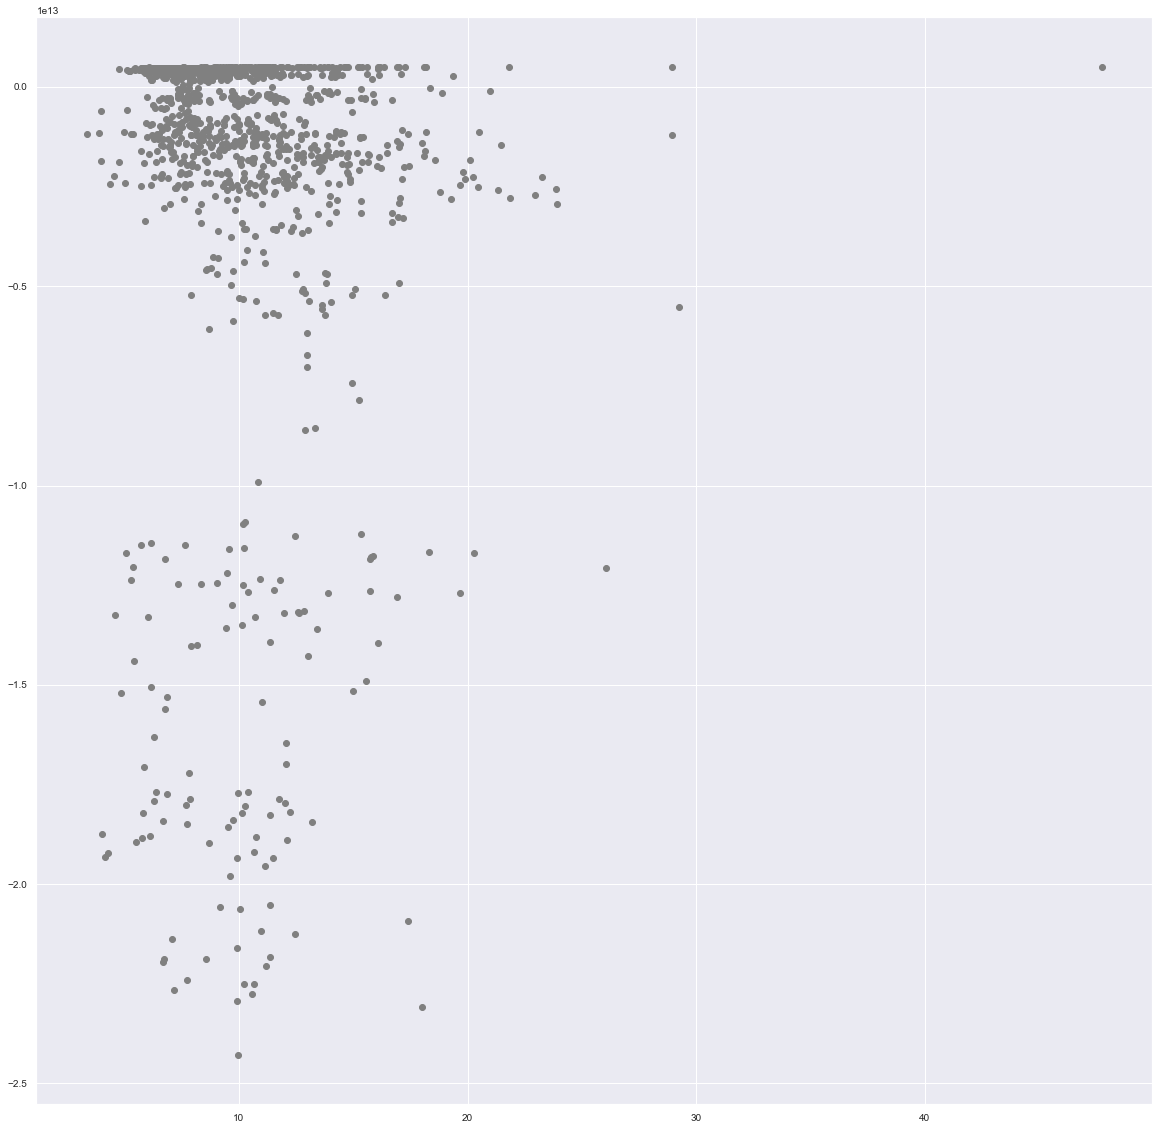

In [812]:
plt.scatter(train_y, lm.predict(train_X), color='grey')
plt.show()

### Trying polynomials

In [813]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.42052688250536197
testing score  0.3709658727708046


In [808]:
# Experiment 3

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.4600579268120043
testing score  0.43091318064826


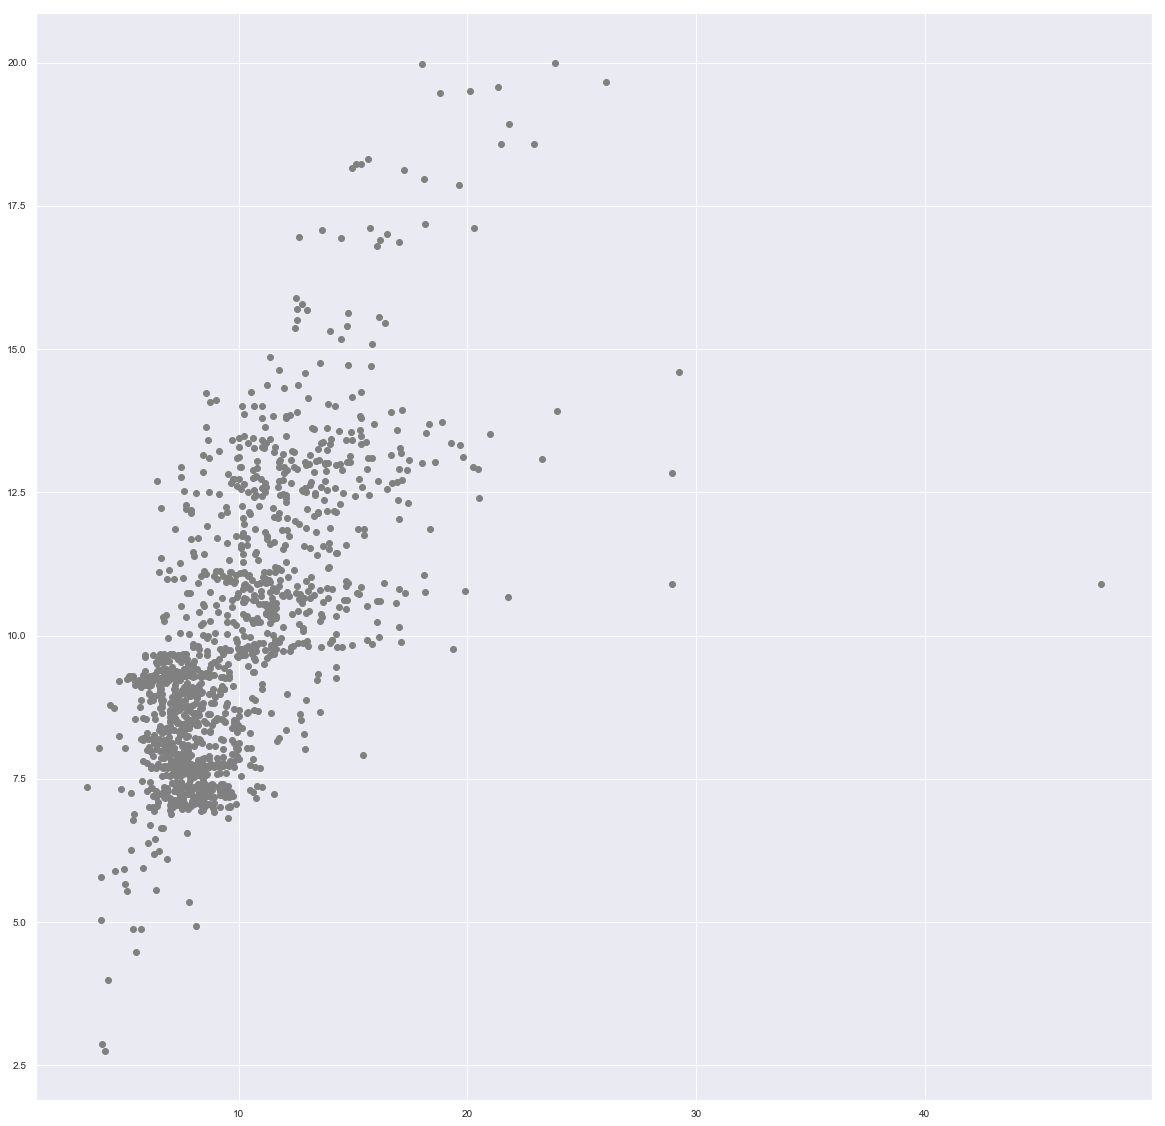

In [811]:
plt.scatter(train_y, pol_reg.predict(X_poly), color='grey')
plt.show()

In [805]:
# Experiment 4


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.3893001172605024
testing score  0.33603753242227674


In [821]:
# Experiment 5 
from sklearn import preprocessing

train_X=preprocessing.normalize(train_X)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))


training score  0.4204354866850566
testing score  -2.012398777900429e+103


In [832]:
# Experiment 6 
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Define the model
lm1 = smf.ols('Average_Transaction_Confirmation_time ~ Open_Price+ Close_Price+Market_Cap+ Daily_Transactions+ Miners_Revenue+Difficuly+ Cost_Per_Transaction+ Average_Block_Size+Total_Bitcoins+ Date_As_Int+ Year', data=Bitcoin_df)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Average_Transaction_Confirmation_time   R-squared:                       0.318
Model:                                               OLS   Adj. R-squared:                  0.316
Method:                                    Least Squares   F-statistic:                     142.7
Date:                                   Wed, 22 Sep 2021   Prob (F-statistic):          1.58e-245
Time:                                           06:16:03   Log-Likelihood:                -7503.2
No. Observations:                                   3064   AIC:                         1.503e+04
Df Residuals:                                       3053   BIC:                         1.509e+04
Df Model:                                             10                                         
Covariance Type:                               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0002   6.47e-05     -3.514      0.000      -0.000      -0.000
Open_Price               0.0003   8.38e-05      3.885      0.000       0.000       0.000
Close_Price              0.0103      0.000     25.144      0.000       0.009       0.011
Market_Cap           -5.487e-10    2.1e-11    -26.124      0.000    -5.9e-10   -5.08e-10
Daily_Transactions   -3.581e-06   1.94e-06     -1.843      0.065   -7.39e-06    2.28e-07
Miners_Revenue       -3.432e-07   2.71e-08    -12.645      0.000   -3.96e-07    -2.9e-07
Difficuly             1.117e-13   3.04e-14      3.674      0.000    5.21e-14    1.71e-13
Cost_Per_Transaction    -0.0180      0.005     -3.397      0.001      -0.028      -0.008
Average_Block_Size       1.7943      0.556      3.230      0.001       0.705       2.884
Total_Bitcoins       -3.018e-06   2.32e-07    -13.012      0.000   -3.47e-06   -2.56e-06
Date_As_Int           8.834e-08   8.84e-09      9.990      0.000     7.1e-08    1.06e-07
Year                    -0.0378      0.005     -7.911      0.000      -0.047      -0.028
==============================================================================
Omnibus:                     1448.725   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22783.385
Skew:                           1.841   Prob(JB):                         0.00
Kurtosis:                      15.841   Cond. No.                     6.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""